In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from fancyimpute import IterativeImputer

In [2]:
## read the train and test files
df = pd.read_csv('D:/datasets/excercise/classification assignment/exercise_40_train.csv')
df_test = pd.read_csv('D:/datasets/excercise/classification assignment/exercise_40_test.csv')

In [3]:
## Initial cleaning
# drop x39 - only single value
df.drop(['x39'], axis = 1, inplace = True)
df_test.drop(['x39'], axis = 1, inplace = True)

In [4]:
# fix categorical column x3, eg: 'Wed' to 'Wednesday'
dict_change_x3 = {'Wed':'Wednesday',
               'Sat':'Saturday', 
               'Sun':'Sunday',
               'Tue':'Tuesday', 
               'Thur':'Thursday', 
               'Fri':'Friday', 
               'Mon':'Monday'}
df['x3'] = df['x3'].replace(dict_change_x3)
df_test['x3'] = df_test['x3'].replace(dict_change_x3)

In [5]:
# x99 - only value = yes, nan - impute nan as no
df['x99'] = df['x99'].fillna('no')
df_test['x99'] = df_test['x99'].fillna('no')

In [6]:
#fix 2 categorical columns which should be numerical
df['x7'] = df['x7'].str.strip('%').astype('float')
df['x19'] = df['x19'].str.strip('$').astype('float')
df_test['x7'] = df_test['x7'].str.strip('%').astype('float')
df_test['x19'] = df_test['x19'].str.strip('$').astype('float')

In [7]:
#fix 2 numerical columns which should be categorical
df['x59'] = (df['x59']).astype(str)
df['x98'] = (df['x98']).astype(str)
df_test['x59'] = (df_test['x59']).astype(str)
df_test['x98'] = (df_test['x98']).astype(str)

In [8]:
#get categorical and numerical variables
cat_cols = [col for col in df.columns if df[col].dtypes =='O']
non_cat_cols = [col for col in df.columns if df[col].dtypes !='O']
df_cols = df.columns

In [9]:
## use iterative imputer for numerical vars
df_num = df[non_cat_cols].copy()
df_num = df_num.drop('y', axis = 1)
it_imp = IterativeImputer()
df_num2 = pd.DataFrame(it_imp.fit_transform(df_num), columns = it_imp.get_feature_names_out())

In [10]:
# perform on test
non_cat_cols.remove('y')
df_test_num = df_test[non_cat_cols].copy()
df_test_num2 = pd.DataFrame(it_imp.transform(df_test_num), columns = it_imp.get_feature_names_out())

In [11]:
## imputations on categorical colum
df_cat2 = df[cat_cols].copy()
# category type 1
df_cat2_1 = df_cat2[['x3', 'x24', 'x31', 'x33', 'x59', 'x60', 'x65', 'x93', 'x98','x99']]
#category type 2
df_cat2_2 = df_cat2[['x77']]

In [12]:
## simple impute on category type 1 - most freq
sim_imp_freq = SimpleImputer(missing_values = np.NaN, strategy='most_frequent')
df_cat2_1 = pd.DataFrame(sim_imp_freq.fit_transform(df_cat2_1), columns = sim_imp_freq.get_feature_names_out())

In [13]:
## simple impute on category type 2- constant
sim_imp_const = SimpleImputer(missing_values = np.NaN, strategy='constant', fill_value = 'NULL')
df_cat2_2 = pd.DataFrame(sim_imp_const.fit_transform(df_cat2_2), columns = sim_imp_const.get_feature_names_out())

In [14]:
#perform on test
df_test_cat2 = df_test[cat_cols].copy()
df_test_cat2_1 = df_test_cat2[['x3', 'x24', 'x31', 'x33', 'x59', 'x60', 'x65', 'x93', 'x98','x99']]
df_test_cat2_2 = df_test_cat2[['x77']]
df_test_cat2_1 = pd.DataFrame(sim_imp_freq.transform(df_test_cat2_1), columns = sim_imp_freq.get_feature_names_out())
df_test_cat2_2 = pd.DataFrame(sim_imp_const.transform(df_test_cat2_2), columns = sim_imp_const.get_feature_names_out())

In [15]:
df_cat2 = df_cat2_1.join(df_cat2_2)

In [16]:
df_test_cat2 = df_test_cat2_1.join(df_test_cat2_2)

In [17]:
## OneHotEncoding on categorical variables
ohe = OneHotEncoder(drop = 'if_binary', sparse_output = False)
df_cat3 = pd.DataFrame(ohe.fit_transform(df_cat2), columns = ohe.get_feature_names_out())

In [18]:
#perform on test
df_test_cat3 = pd.DataFrame(ohe.transform(df_test_cat2), columns = ohe.get_feature_names_out())

In [19]:
## standard scaling on numerical variables
scalar = StandardScaler()
df_num3 = pd.DataFrame(scalar.fit_transform(df_num2), columns = scalar.get_feature_names_out())

In [20]:
#perform on test
df_test_num3 = pd.DataFrame(scalar.transform(df_test_num2), columns = scalar.get_feature_names_out())

In [21]:
df_x = df_num3.join(df_cat3)

In [22]:
df_test_x = df_test_num3.join(df_test_cat3)

In [23]:
df_y = df['y']

In [24]:
## split training table into train and test 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.2,random_state=1)

In [26]:
### building models
# as directed the models were chosen based on 'AUC score'
# another approach would be to change the weightage of the training dataset since it is pretty imbalanced
#We could use specificity/ sensitivity, etc or basically to get higher True '1' rate
# doing so reduced the AUC score so it was avoided

In [27]:
## model 1
# logistic regression
#features selected in prior iterations

logreg = LogisticRegression(
    C = 100000000,
    penalty = None,
    fit_intercept = False,
)

In [28]:
logreg.fit(x_train, y_train)

C:\Users\EHOT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\EHOT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000000, fit_intercept=False, penalty=None)

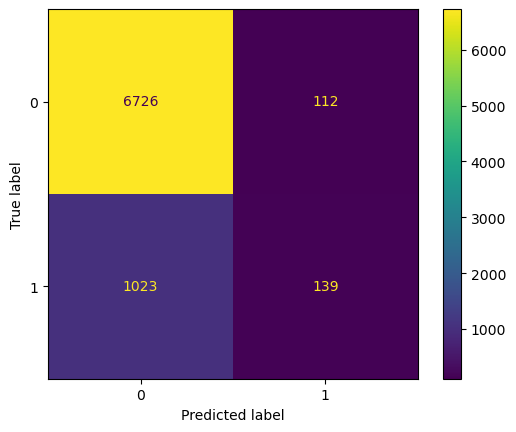

In [29]:
yhat = logreg.predict(x_test)
logreg_pred_test = list(map(round, yhat))
ConfusionMatrixDisplay(confusion_matrix(y_test, logreg_pred_test)).plot()

In [30]:
print('AUC for logistic regression : ', roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1]))

AUC for logistic regression :  0.7682061971195693


In [31]:
## model 2

In [32]:
# XGBOOST

In [33]:
#features selected in prior iterations

In [34]:
clf_xgb = xgb.XGBClassifier(
    objective = 'binary:logistic',
    missing = np.NaN,
    seed = 42,
    scale_pos_weight = 1,
    gamma = 1.5,
    learning_rate = 0.15,
    max_depth = 4,
    reg_lambda = 15,
)

In [35]:
clf_xgb.fit(x_train, y_train,
           verbose = False,
           early_stopping_rounds = 10,
           eval_metric = 'aucpr',
           eval_set = [(x_test, y_test)])

C:\Users\EHOT\anaconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\EHOT\anaconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

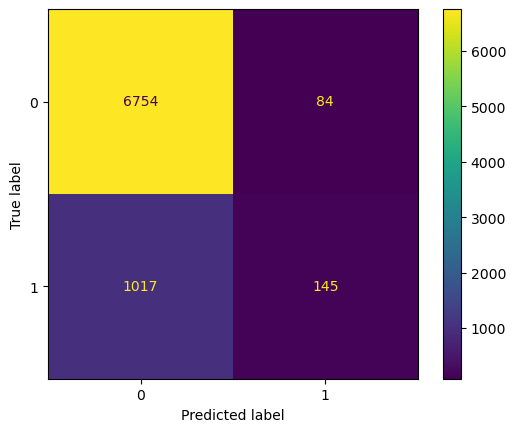

In [36]:
cm = confusion_matrix(y_test, clf_xgb.predict(x_test))
ConfusionMatrixDisplay(cm).plot()

In [37]:
print('AUC for XGBOOST : ', roc_auc_score(y_test, clf_xgb.predict_proba(x_test)[:,1]))

AUC for XGBOOST :  0.798403323736596


In [38]:
##output files

In [39]:
#pd.DataFrame(logreg.predict_proba(df_test_x)[:,1]).to_csv('D:/datasets/interviews/state farm/glmresults.csv', index = False, header = False)

In [40]:
#pd.DataFrame(clf_xgb.predict_proba(df_test_x)[:,1]).to_csv('D:/datasets/interviews/state farm/nonglmresults.csv', index = False, header = False)